In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler

In [2]:
data = np.array(pd.read_csv('~/DataSet3/1.csv'))

In [3]:
data1=data[:,1:4]
labels = data[:,-1]
labels

array([1., 1., 1., ..., 7., 7., 0.])

**Scalling data to normalize the effect of each dimention and also reduce effect of outliers**

In [4]:
scaler = StandardScaler()
scaler.fit(data1)
sample = scaler.transform(data1)
print(scaler.mean_)

[1910.67337231 2380.28738462 2041.21414154]


**Elbow implementation with Sum Of Squared Error as validation matrix**

In [10]:
SSE={}
K = range(1,10)
for k in K :
    SSE[k]=0
    kmeansModel = KMeans(n_clusters=k)
    labels= kmeansModel.fit_predict(sample)
    centers = kmeansModel.cluster_centers_
    sample_transformed = kmeansModel.fit_transform(sample)
    #print(labels)
    #print(sample_transformed)
    for i in range(0,k):
        #print('shit')
        cluster_datapoints = sample_transformed[labels==i]
        #print(cluster_datapoints)
        #Mean distance of data points in this cluster from center
        cluster_mean = cluster_datapoints[:,i].mean()
        print('cluster mean ='+str(cluster_mean))
        #Calculate Sum of Squared error by substracting cluster mean 
        #from distance of each point from respective centers 
        for datapoint in cluster_datapoints:
            SSE[k]+= (datapoint[i]-cluster_mean)**2
    print(SSE)

cluster mean =1.4785656756047578
{1: 132249.57572505824}
cluster mean =1.019762610658836
cluster mean =0.7583576708176816
{1: 132249.57572505824, 2: 138958.0989734966}
cluster mean =0.8592000888696462
cluster mean =0.673657559815194
cluster mean =1.7862063953263452
{1: 132249.57572505824, 2: 138958.0989734966, 3: 70507.09383493863}
cluster mean =3.723617085443718
cluster mean =0.6032027497114588
cluster mean =2.1865619388378867
cluster mean =5.204204987400859
{1: 132249.57572505824, 2: 138958.0989734966, 3: 70507.09383493863, 4: 47811.702755825514}
cluster mean =2.8240137579849507
cluster mean =2.8227902287116224
cluster mean =1.7445291034845547
cluster mean =2.4298979653401602
cluster mean =2.3602165458384348
{1: 132249.57572505824, 2: 138958.0989734966, 3: 70507.09383493863, 4: 47811.702755825514, 5: 42120.27982835231}
cluster mean =0.44733865710896314
cluster mean =0.4660228025919588
cluster mean =1.7256622524555425
cluster mean =2.411192865703072
cluster mean =2.580314464684374
clu

In [11]:
SSE_array=[]
slope=[]
for key,value in SSE.items():
    SSE_array.append(value)
print(SSE_array)

#Calculate slope of each line
for p in range(1,9):
    s= (SSE_array[p]-SSE_array[p-1])
    slope.append([p+1,s])
slope

[132249.57572505824, 138958.0989734966, 70507.09383493863, 47811.702755825514, 42120.27982835231, 42342.300985158254, 35658.37319452032, 38613.044595809246, 38518.55848728166]


[[2, 6708.523248438374],
 [3, -68451.00513855799],
 [4, -22695.391079113113],
 [5, -5691.422927473206],
 [6, 222.0211568059458],
 [7, -6683.927790637936],
 [8, 2954.671401288928],
 [9, -94.48610852758429]]

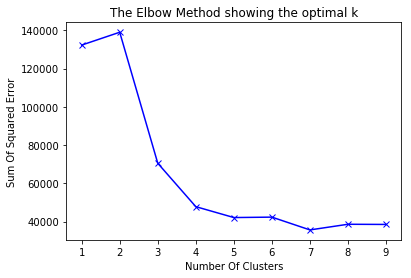

In [12]:
plt.plot(K,SSE_array,'bx-')
plt.xlabel('Number Of Clusters')
plt.ylabel('Sum Of Squared Error')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [13]:
slope

[[2, 6708.523248438374],
 [3, -68451.00513855799],
 [4, -22695.391079113113],
 [5, -5691.422927473206],
 [6, 222.0211568059458],
 [7, -6683.927790637936],
 [8, 2954.671401288928],
 [9, -94.48610852758429]]

In [14]:
#chose the value after which there is a reduction in gain(rather loss)
for a in range(0,7):
    change_slope=(slope[a])[-1] - (slope[a+1])[-1]
    if change_slope > 0:
        print('Optimal Number of Clusters = '+str((slope[a][0])-1))

Optimal Number of Clusters = 1
Optimal Number of Clusters = 5
Optimal Number of Clusters = 7
